In [2]:
import GetOldTweets3 as got
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
num_days = 80

dates = [datetime.date(day=16,month=1,year=2019) + datetime.timedelta(days=x+1) for x in range(num_days)]

all_tweets = pd.DataFrame()

for date in dates:
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('corona virus')\
                                               .setSince(str(date))\
                                               .setUntil(str(date+datetime.timedelta(days=1)))\
    #                                            .setMaxTweets(1000)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    store_tweets = pd.DataFrame(columns = ['username', 'to', 'text', 'date', 'retweets',
                                           'favorites','mentions', 'hashtags', 'geo'])

    for tweet in tweets:
        store_tweets.loc[tweet.id] = [tweet.username,tweet.to, tweet.text, 
                                      tweet.date, tweet.retweets, tweet.favorites, 
                                      tweet.mentions, tweet.hashtags, tweet.geo]
    all_tweets = all_tweets.append(store_tweets)

In [51]:
# all_tweets.to_csv('corona_tweets.csv')
all_tweets.head()

,username,to,text,date,retweets,favorites,mentions,hashtags,geo
1085989633471569920,npokorzynski,None,This is awesome - over 500 host proteins in th...,2019-01-17 19:57:59+00:00,0,0,,,
1085900986625867777,FluTrackers,None,WHO: Middle East respiratory syndrome coronavi...,2019-01-17 14:05:44+00:00,0,0,,,
1085833427549511680,RazasPorcinas,None,Descubren un nuevo coronavirus llamado Síndrom...,2019-01-17 09:37:17+00:00,0,0,,,
1085810148512124928,JohnJasonFallow,None,Disease outbreak news from the WHO: Middle Eas...,2019-01-17 08:04:47+00:00,0,0,,,
1085809112997347328,RameshSuno,None,Disease outbreak news from the WHO: Middle Eas...,2019-01-17 08:00:40+00:00,0,0,,,


In [3]:
corona_tweets = pd.read_csv('corona_tweets_1.csv').append(pd.read_csv('corona_tweets_2.csv'))
corona_tweets = corona_tweets.rename({'Unnamed: 0':'tweet_id'}, axis=1)

corona_tweets.to_csv('corona_tweets_full.csv')

corona_tweets['date'] = pd.to_datetime(corona_tweets.date)
corona_tweets.head()

,tweet_id,username,to,text,date,retweets,favorites,mentions,hashtags,geo
0,1201617948319850499,CoronaVirus_exe,Lucioz7,"Vdd, tem que pôr o poste do presidiário no lug...",2019-12-02 21:43:38+00:00,0,0,NaN,NaN,NaN
1,1201616941124857862,CoronaVirus_exe,SenadoFederal,Que estupidez! Muito ajuda quem não atrapalha.,2019-12-02 21:39:38+00:00,0,18,NaN,NaN,NaN
2,1201603683265515521,LiminalWitch,NaN,Me preocupa que Terry está con diarrea otra ve...,2019-12-02 20:46:57+00:00,0,0,NaN,NaN,NaN
3,1201601611421945856,CoronaVirus_exe,groovytoria,Que fotos foda! sdds da época que eu andava tbm,2019-12-02 20:38:43+00:00,0,1,NaN,NaN,NaN
4,1201589439400681472,CoronaVirus_exe,Bela_e_Moral,"Porém, estará agredindo o olfato de outras pes...",2019-12-02 19:50:21+00:00,0,0,NaN,NaN,NaN


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

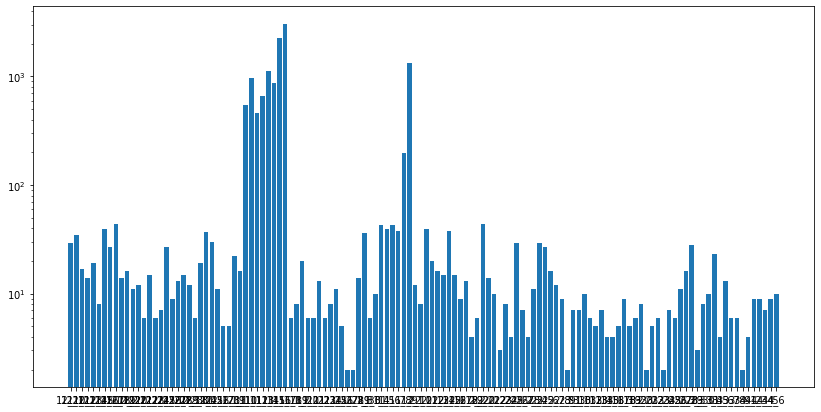

In [87]:
values = corona_tweets['date'].apply(lambda x: str(x.month) + '_' + str(x.day)).value_counts()
test = pd.Series(values.index,values.values).sort_values()
plt.figure(figsize=(14,7))
plt.bar(test.values,test.index,log=True)

n = 7  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(plt.xaxis.get_ticklabels()) if i % n != 0]

In [19]:
import pandas as pd

import tweepy
from tweepy import Stream
from tweepy import StreamListener 
from tweepy import OAuthHandler
import json
consumer_key = "YOUR CONSUMER KEY"
consumer_secret = "YOUR CONSUMER SECRET"
access_token = "YOUR ACCESS TOKEN"
access_secret = "YOUR ACCESS SECRET"
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)
@classmethod
def parse(cls, api, raw):
    status = cls.first_parse(api, raw)
    setattr(status, 'json', json.dumps(raw))
    return status
 
# Status() is the data model for a tweet
tweepy.models.Status.first_parse = tweepy.models.Status.parse
tweepy.models.Status.parse = parse
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('FILENAME.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
#Set the hashtag to be searched
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['#coronavirus'])

401


KeyboardInterrupt: 